In [1]:
# import the libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as smf
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

#### Problem Statement :-
##### Delivery_time -> Predict delivery time using sorting time

In [2]:
# import dataset
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### EDA and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,Delivery Time,Sorting Time


In [8]:
# Renaming Columns
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


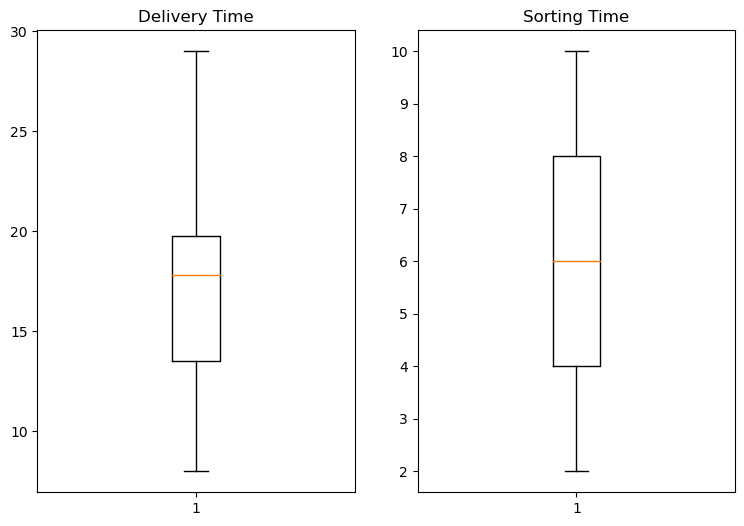

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [10]:
# Checking the Correlation between variables
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

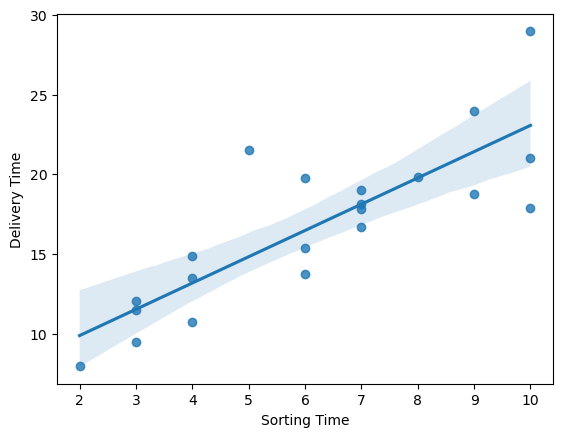

In [11]:
# Visualization of Correlation beteen x and y
# regplot = regression plot
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

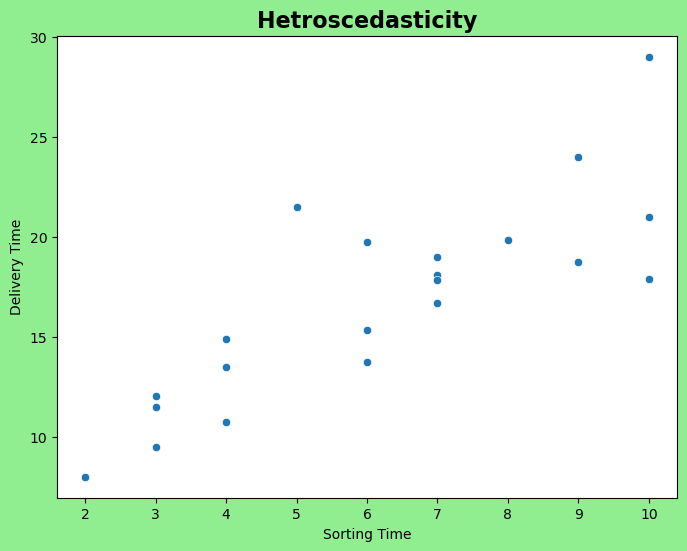

In [12]:
# Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

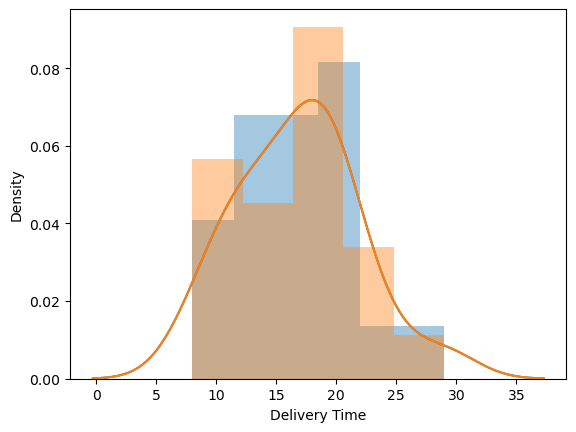

In [13]:
# Feature Engineering - plot for Delivery Time
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
sns.distplot(df['Delivery Time'])
plt.show()

<Axes: xlabel='Sorting Time', ylabel='Density'>

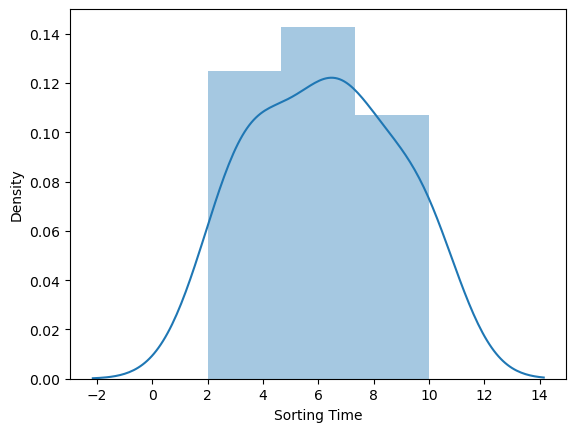

In [14]:
# Feature Engineering - plot for Sorting Time
sns.distplot(df['Sorting Time'])

#### Model Building 

In [15]:
# model building 
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        00:39:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Testing 

In [17]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [19]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Model Predictions 

In [20]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [21]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [23]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64